In [ ]:
import sys
import os
sys.path.append(os.path.abspath('../src'))
sys.path.append(os.path.abspath('../Dataset'))
sys.path.append(os.path.abspath('..'))

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from func_preprocesamiento import preprocesar, acotar_caracteristicas

#### NO correr esto, vuelve a procesar datasets

In [2]:
dev_df = pd.read_csv('../Dataset/raw/dev_lim.csv')
bins = pd.qcut(dev_df['precio_pesos_constantes'], q=5, labels=False)  # 4 cuartiles
train_dataset, val_dataset = train_test_split(dev_df, train_size=0.8, random_state=42, stratify=bins)

train_dataset.to_csv('../Dataset/Procesado/train_completo.csv', index=False)
val_dataset.to_csv('../Dataset/Procesado/val_completo.csv', index=False)

/tmp/ipykernel_56741/4150077850.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  dev_df = pd.read_csv('../Dataset/raw/dev_lim.csv')


In [3]:
train_procesado = preprocesar(train_dataset, 'train')
train_procesado.to_csv('../Dataset/Procesado/train_procesado_lim.csv', index=False)

In [4]:
df_val = preprocesar(val_dataset, 'val')
df_val.to_csv('../Dataset/Procesado/val_procesado_lim.csv', index=False)

## DATASET NUMERICO

In [9]:
#ARMAMOS EL DATASET NUMERICO SACANDO LAS COLUMNAS CATEGORICAS
train_procesado = pd.read_csv('../Dataset/Procesado/train_procesado_lim.csv')
val_procesado = pd.read_csv('../Dataset/Procesado/val_procesado_lim.csv')

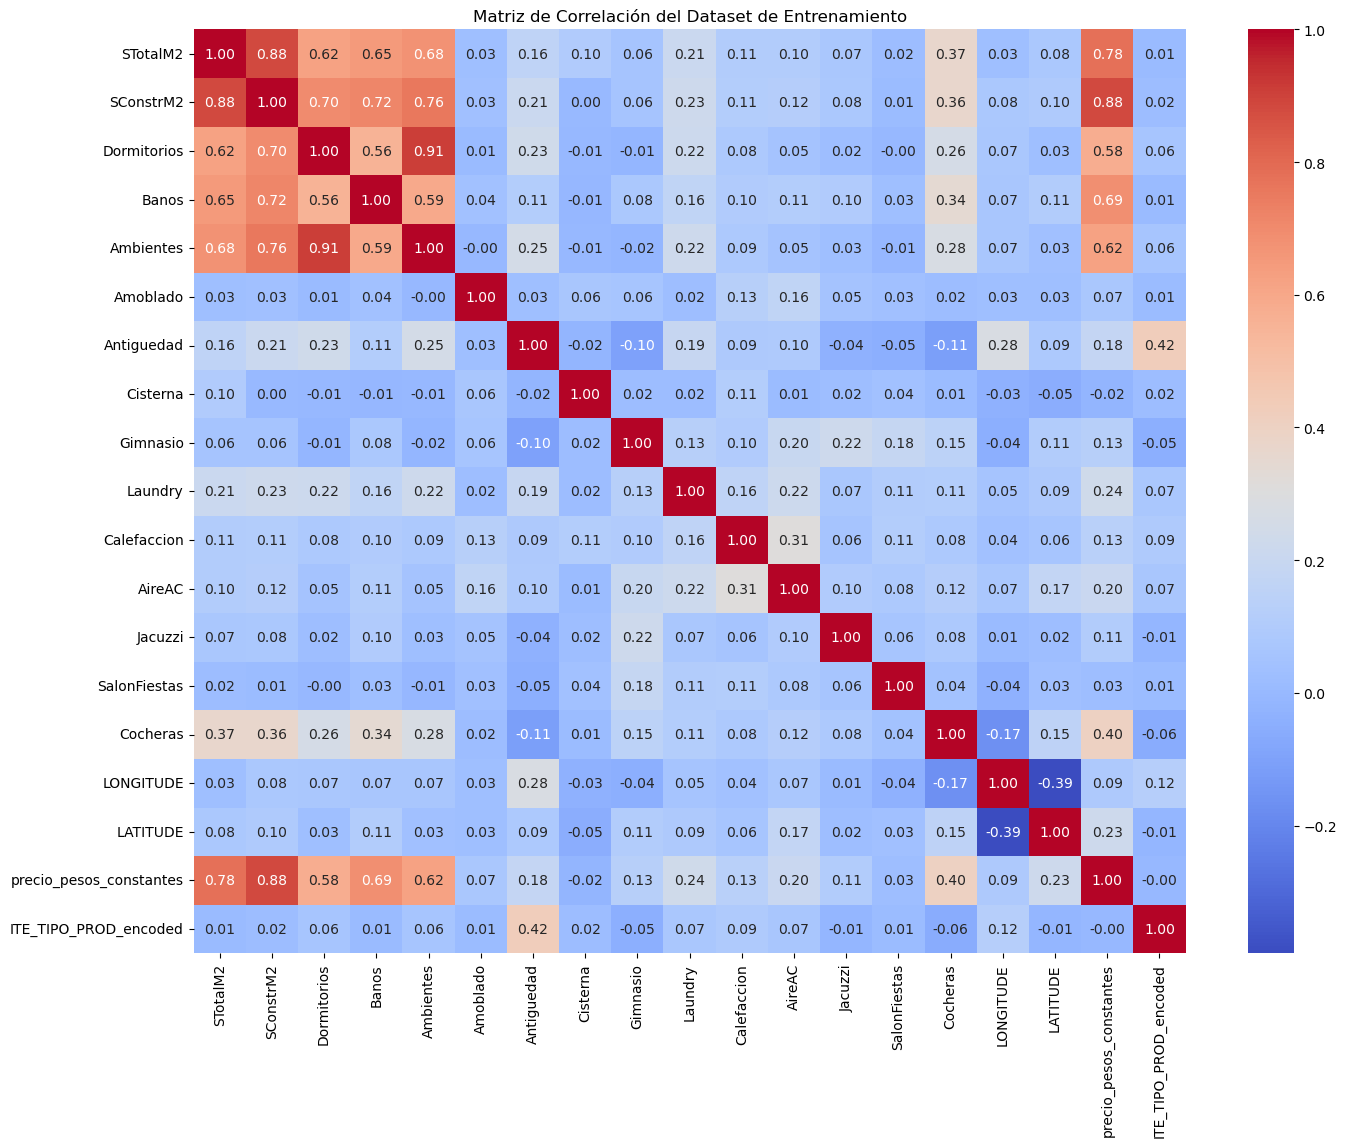

In [ ]:
# Crear la matriz de correlación
correlation_matrix = train_procesado.corr()

# Crear un mapa de calor de la matriz de correlación
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación del Dataset de Entrenamiento')
plt.show()

### NUEVO

In [ ]:
from sklearn.ensemble import IsolationForest

# Seleccionar las características a usar
X = train_procesado[['Cocheras', 'precio_pesos_constantes']]


# Configurar y entrenar el modelo Isolation Forest
iso_forest = IsolationForest(contamination=0.005, random_state=5)  # Ajusta contamination según tu criterio
iso_forest.fit(X)

# Predecir los outliers
train_procesado['anomaly_score'] = iso_forest.predict(X)

# Identificar outliers
outliers = train_procesado[train_procesado['anomaly_score'] == -1]


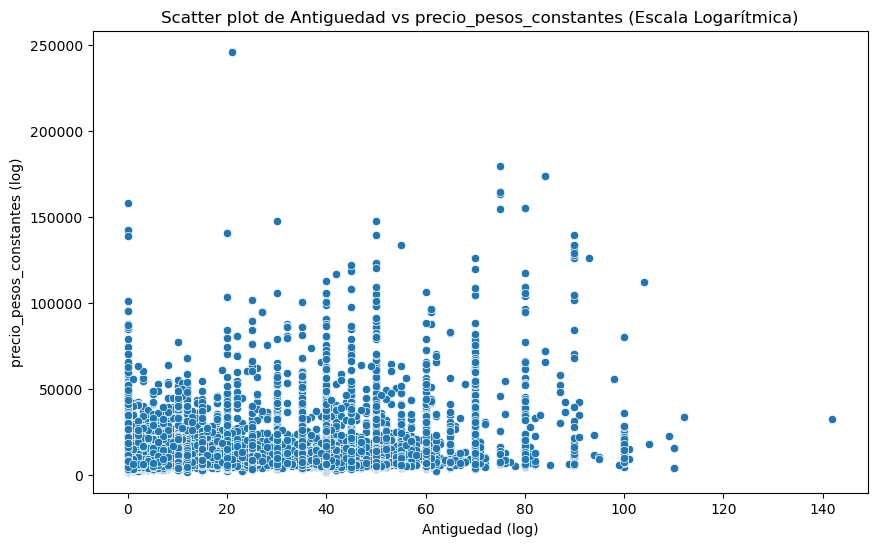

In [8]:
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(x=val_procesado['Antiguedad'], y=val_procesado['precio_pesos_constantes'])
plt.title('Scatter plot de Antiguedad vs precio_pesos_constantes (Escala Logarítmica)')
plt.xlabel('Antiguedad (log)')
plt.ylabel('precio_pesos_constantes (log)')
plt.show()

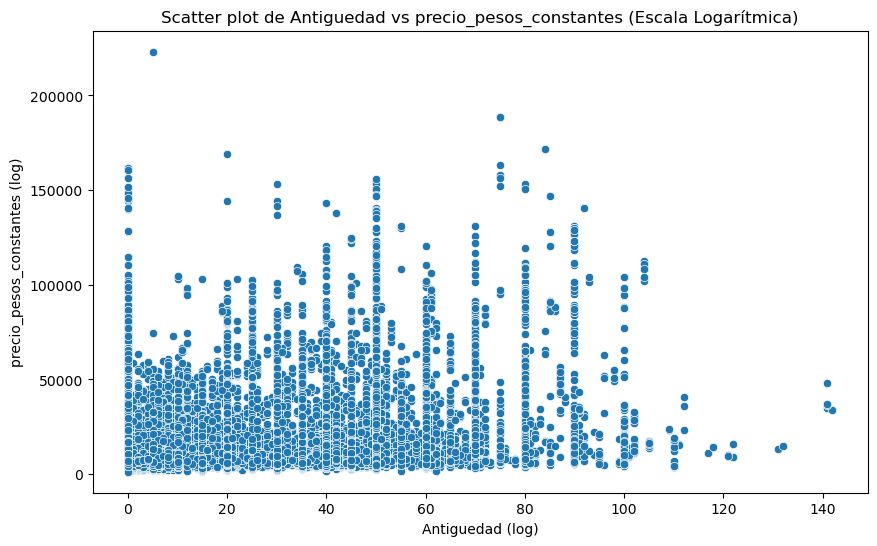

In [9]:
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(x=train_procesado['Antiguedad'], y=train_procesado['precio_pesos_constantes'])
plt.title('Scatter plot de Antiguedad vs precio_pesos_constantes (Escala Logarítmica)')
plt.xlabel('Antiguedad (log)')
plt.ylabel('precio_pesos_constantes (log)')
plt.show()

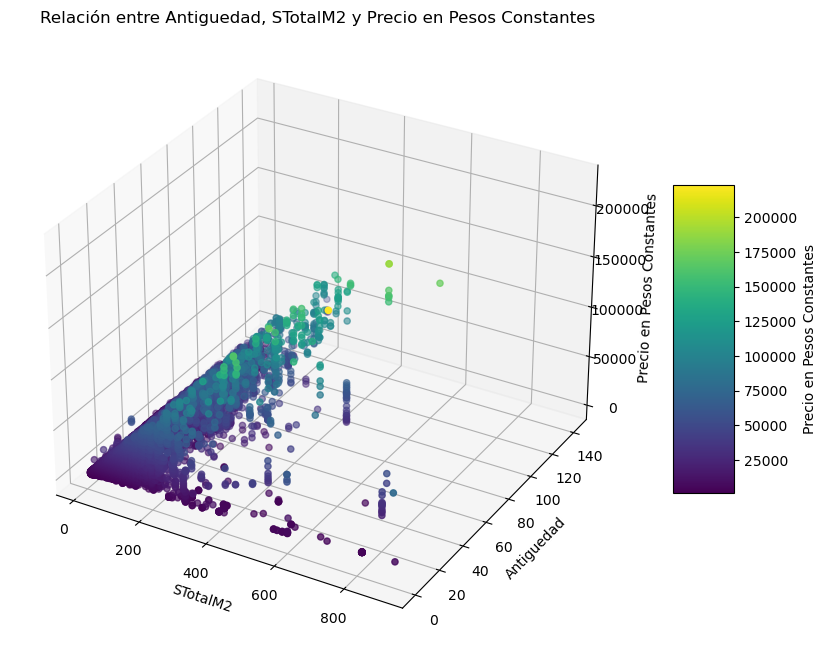

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Crear un scaler
scaler = MinMaxScaler()

# Normalizar la columna 'precio_pesos_constantes'
train_procesado['precio_pesos_constantes_normalizado'] = scaler.fit_transform(train_procesado[['precio_pesos_constantes']])

# Crear la figura y los ejes 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Graficar los datos con colores según el precio en pesos constantes
sc = ax.scatter(train_procesado['STotalM2'],
                train_procesado['Antiguedad'],  
                train_procesado['precio_pesos_constantes'], 
                c=train_procesado['precio_pesos_constantes'], 
                cmap='viridis', 
                marker='o')

# Etiquetas de los ejes
ax.set_ylabel('Antiguedad')
ax.set_xlabel('STotalM2')
ax.set_zlabel('Precio en Pesos Constantes')

# Título del gráfico
ax.set_title('Relación entre Antiguedad, STotalM2 y Precio en Pesos Constantes')

# Añadir barra de color
cbar = plt.colorbar(sc, ax=ax, shrink=0.5, aspect=5)
cbar.set_label('Precio en Pesos Constantes')

# Mostrar el gráfico
plt.show()

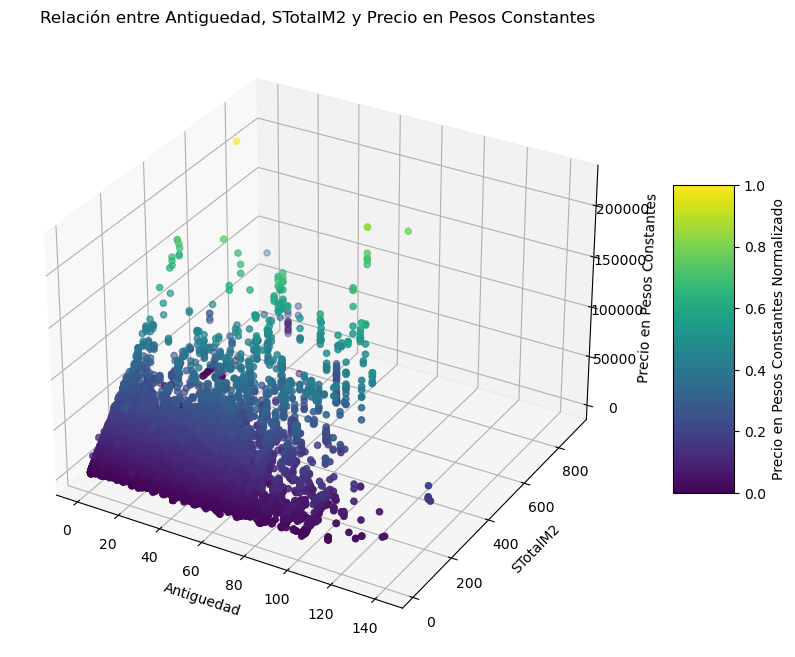

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Crear un scaler
scaler = MinMaxScaler()

# Normalizar la columna 'precio_pesos_constantes'
train_procesado['precio_pesos_constantes_normalizado'] = scaler.fit_transform(train_procesado[['precio_pesos_constantes']])
# Crear la figura y los ejes 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Graficar los datos con colores según el precio en pesos constantes normalizado
sc = ax.scatter(train_procesado['Antiguedad'], 
                train_procesado['STotalM2'], 
                train_procesado['precio_pesos_constantes'], 
                c=train_procesado['precio_pesos_constantes_normalizado'], 
                cmap='viridis', 
                marker='o')

# Etiquetas de los ejes
ax.set_xlabel('Antiguedad')
ax.set_ylabel('STotalM2')
ax.set_zlabel('Precio en Pesos Constantes')

# Título del gráfico
ax.set_title('Relación entre Antiguedad, STotalM2 y Precio en Pesos Constantes')

# Añadir barra de color
cbar = plt.colorbar(sc, ax=ax, shrink=0.5, aspect=5)
cbar.set_label('Precio en Pesos Constantes Normalizado')

# Mostrar el gráfico
plt.show()

/tmp/ipykernel_90103/3547188220.py:24: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  scatter_plot.figure.colorbar(sm, label='Precio en Pesos Constantes (Log)')


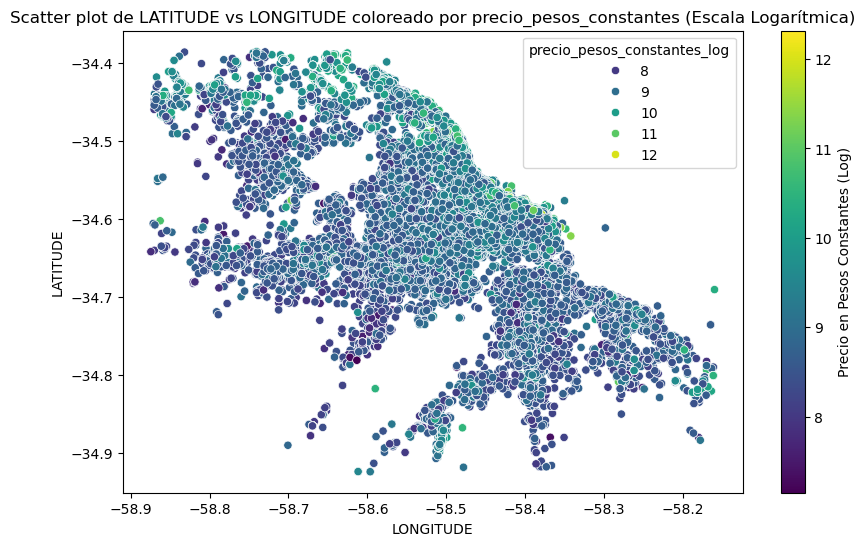

In [ ]:
# Aplicar escala logarítmica al precio
train_procesado['precio_pesos_constantes_log'] = np.log(train_procesado['precio_pesos_constantes'])

# Crear un scatter plot de LATITUDE y LONGITUDE, coloreando por precio_pesos_constantes_log
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(x=train_procesado['LONGITUDE'], 
                               y=train_procesado['LATITUDE'], 
                               hue=train_procesado['precio_pesos_constantes_log'], 
                               palette='viridis')

plt.title('Scatter plot de LATITUDE vs LONGITUDE coloreado por precio_pesos_constantes (Escala Logarítmica)')
plt.xlabel('LONGITUDE')
plt.ylabel('LATITUDE')

# Añadir barra de color
norm = plt.Normalize(train_procesado['precio_pesos_constantes_log'].min(), train_procesado['precio_pesos_constantes_log'].max())
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])
scatter_plot.figure.colorbar(sm, label='Precio en Pesos Constantes (Log)')

plt.show()

In [ ]:
# Crear un scatter plot de LATITUDE y LONGITUDE, coloreando por ITE_ADD_STATE_NAME_encoded
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(x=train_completo['LATITUDE'], 
                               y=train_completo['LONGITUDE'],
                               hue=train_completo['ITE_ADD_STATE_NAME_encoded'], 
                               palette='Set1')  # Usar la paleta Set1 para colores distintos

plt.title('Scatter plot de LATITUDE vs LONGITUDE coloreado por Estado')
plt.xlabel('LATITUDE')
plt.ylabel('LONGITUDE')

# Mostrar la leyenda
plt.legend(title='ITE_ADD_STATE_NAME_encoded', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

NameError: name 'train_completo' is not defined

<Figure size 1000x600 with 0 Axes>

/tmp/ipykernel_9584/1560797014.py:20: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  scatter_plot.figure.colorbar(sm, label='Antiguedad')
/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


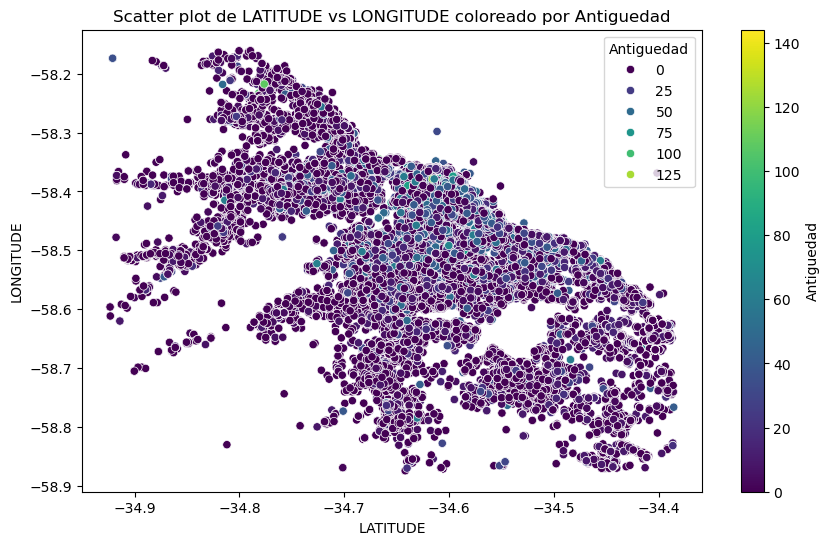

In [ ]:
# Crear un scatter plot de LATITUDE y LONGITUDE, coloreando por precio_pesos_constantes
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(x=train_procesado['LATITUDE'], 
                               y=train_procesado['LONGITUDE'],
                               hue=train_procesado['Antiguedad'], 
                               palette='viridis')

plt.title('Scatter plot de LATITUDE vs LONGITUDE coloreado por Antiguedad')
plt.xlabel('LATITUDE')
plt.ylabel('LONGITUDE')

# Añadir barra de color
norm = plt.Normalize(train_procesado['Antiguedad'].min(), train_procesado['Antiguedad'].max())
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])
scatter_plot.figure.colorbar(sm, label='Antiguedad')

plt.show()

/tmp/ipykernel_9584/223918179.py:20: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  scatter_plot1.figure.colorbar(sm1, label='Precio en Pesos Constantes')


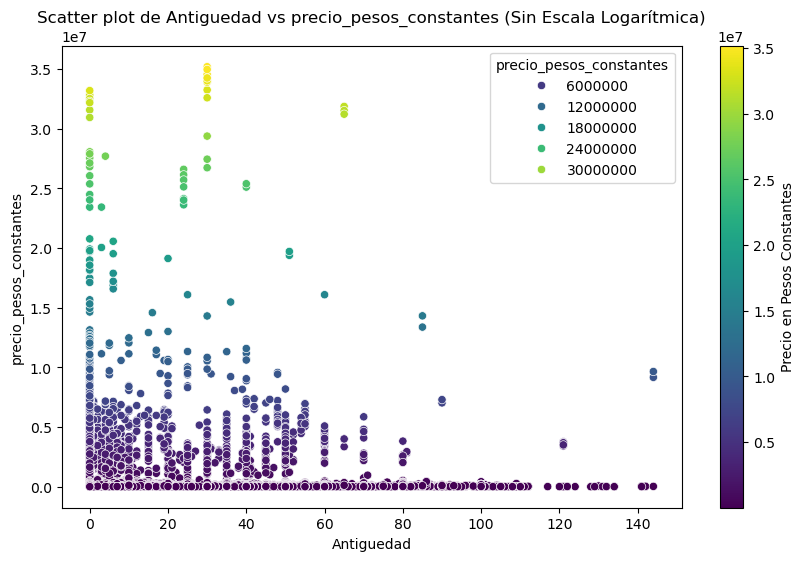

/tmp/ipykernel_9584/223918179.py:40: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  scatter_plot2.figure.colorbar(sm2, label='Precio en Pesos Constantes')


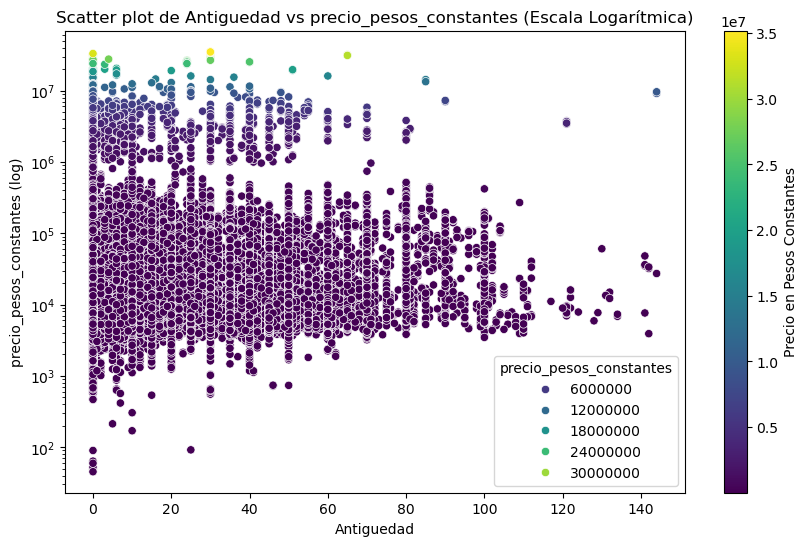

In [ ]:
# Crear el primer scatter plot sin escala logarítmica
plt.figure(figsize=(10, 6))
scatter_plot1 = sns.scatterplot(x=train_procesado['Antiguedad'], 
                                y=train_procesado['precio_pesos_constantes'], 
                                hue=train_procesado['precio_pesos_constantes'], 
                                palette='viridis')

plt.title('Scatter plot de Antiguedad vs precio_pesos_constantes (Sin Escala Logarítmica)')
plt.xlabel('Antiguedad')
plt.ylabel('precio_pesos_constantes')

# Añadir barra de color
norm1 = plt.Normalize(train_procesado['precio_pesos_constantes'].min(), train_procesado['precio_pesos_constantes'].max())
sm1 = plt.cm.ScalarMappable(cmap="viridis", norm=norm1)
sm1.set_array([])
scatter_plot1.figure.colorbar(sm1, label='Precio en Pesos Constantes')

plt.show()

# Crear el segundo scatter plot con escala logarítmica
plt.figure(figsize=(10, 6))
scatter_plot2 = sns.scatterplot(x=train_procesado['Antiguedad'], 
                                y=train_procesado['precio_pesos_constantes'], 
                                hue=train_procesado['precio_pesos_constantes'], 
                                palette='viridis')

plt.title('Scatter plot de Antiguedad vs precio_pesos_constantes (Escala Logarítmica)')
plt.xlabel('Antiguedad')
plt.ylabel('precio_pesos_constantes (log)')
plt.yscale('log')

# Añadir barra de color
norm2 = plt.Normalize(train_procesado['precio_pesos_constantes'].min(), train_procesado['precio_pesos_constantes'].max())
sm2 = plt.cm.ScalarMappable(cmap="viridis", norm=norm2)
sm2.set_array([])
scatter_plot2.figure.colorbar(sm2, label='Precio en Pesos Constantes')

plt.show()

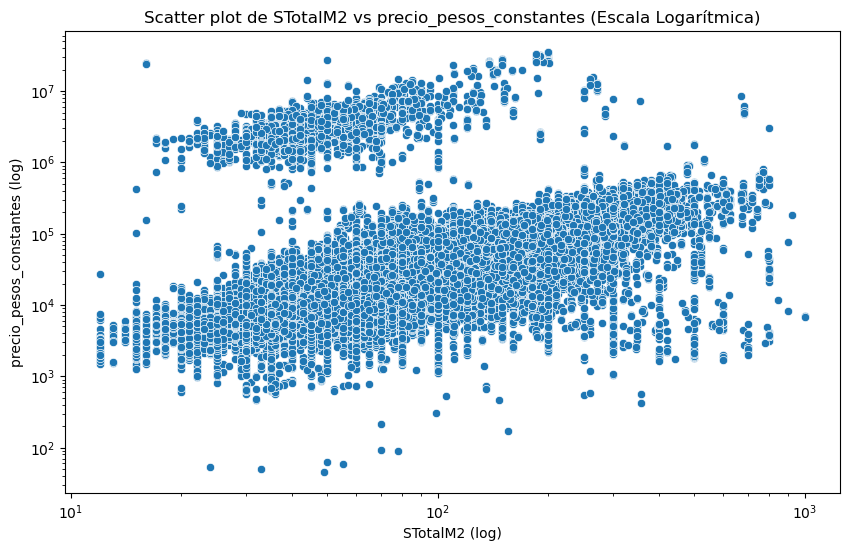

In [ ]:
# Crear un scatter plot de precio_pesos_constantes y STotalM2 en escala logarítmica
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(x=train_procesado['STotalM2'], y=train_procesado['precio_pesos_constantes'])
scatter_plot.set(xscale="log", yscale="log")
plt.title('Scatter plot de STotalM2 vs precio_pesos_constantes (Escala Logarítmica)')
plt.xlabel('STotalM2 (log)')
plt.ylabel('precio_pesos_constantes (log)')
plt.show()

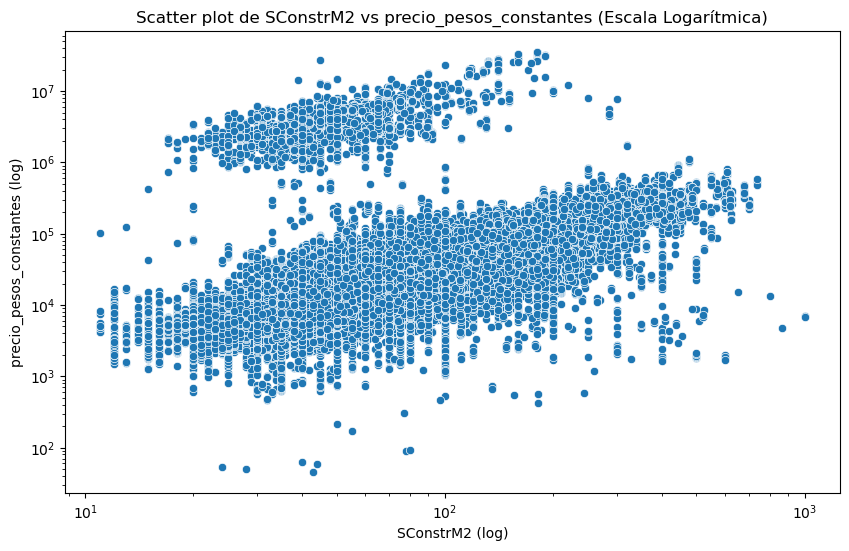

In [ ]:
# Crear un scatter plot de precio_pesos_constantes y STotalM2 en escala logarítmica
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(x=train_procesado['SConstrM2'], y=train_procesado['precio_pesos_constantes'])
scatter_plot.set(xscale="log", yscale="log")
plt.title('Scatter plot de SConstrM2 vs precio_pesos_constantes (Escala Logarítmica)')
plt.xlabel('SConstrM2 (log)')
plt.ylabel('precio_pesos_constantes (log)')
plt.show()

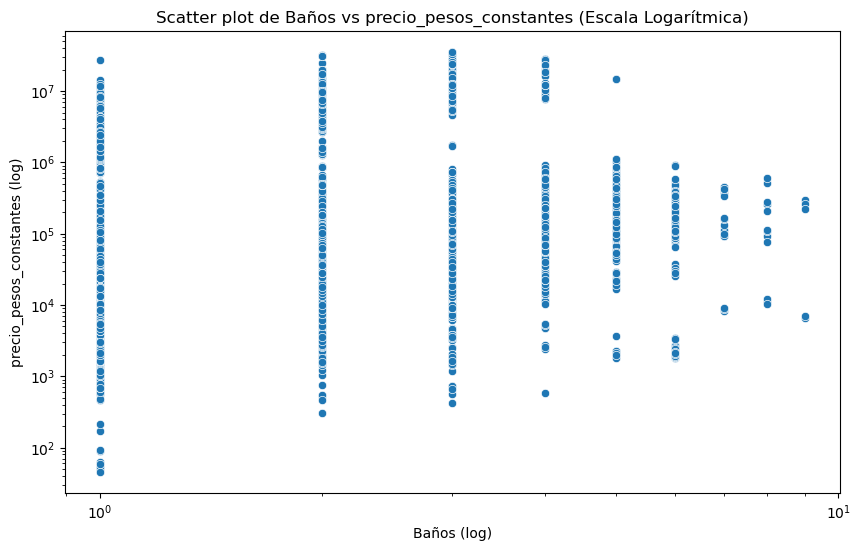

In [ ]:
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(x=train_procesado['Banos'], y=train_procesado['precio_pesos_constantes'])
scatter_plot.set(xscale="log", yscale="log")
plt.title('Scatter plot de Baños vs precio_pesos_constantes (Escala Logarítmica)')
plt.xlabel('Baños (log)')
plt.ylabel('precio_pesos_constantes (log)')
plt.show()